# Wine Quality Dataset  - [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality)

Cassification of red and white variants of Vinho Verde from Portugal.

### Included in the dataset:


* Input variables (based on physicochemical tests): 

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide 

7 - total sulfur dioxide 

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

* Output variable (based on sensory data): 

12 - quality (score 0-10)

# Quality Prediction

Cherry wine chemical analysis data

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - free sulfur dioxide 

6 - total sulfur dioxide 

7 - density 

8 - pH 

9 - alcohol 


### References:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

S. Güven. 
Vişneden çeşitli tipte şarap üretimi üzerine araştırmalar. GIDA, Tar. Or. ve Köy. Bak. İl. Kont. Laboratuvar Müdürlüğü - Çanakkale, 15(3):167-172, 1990.

## Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn

import warnings
warnings.filterwarnings("ignore")

## Data Prep

In [4]:
df_white = pd.read_csv("winequality-white.csv",delimiter=";")

In [5]:
df_red = pd.read_csv("winequality-red.csv", delimiter=";")

In [6]:
df_white["type"] = "white"
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [7]:
df_red["type"] = "red"
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [8]:
frames = [df_red, df_white]
df = pd.concat(frames)

In [9]:
def wine_quality(x):
    if x <= 5:
        x = "low"
    elif x > 5 and x < 7:
        x = "medium"
    else:
        x = "high"
    return(x)

df["abs quality"] = df["quality"].apply(lambda x: wine_quality(x))

In [10]:
df.head(-10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,abs quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,6,white,medium
4884,6.5,0.33,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5,white,low
4885,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,white,medium
4886,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white,high


In [11]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

quality_score = label.fit_transform(df["abs quality"])
print(quality_score)
print(label.classes_)

df["quality score"] = quality_score
df

[1 1 1 ... 2 0 2]
['high' 'low' 'medium']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,abs quality,quality score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,high,0


In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
abs quality             0
quality score           0
dtype: int64

## EDA

<AxesSubplot:xlabel='type', ylabel='count'>

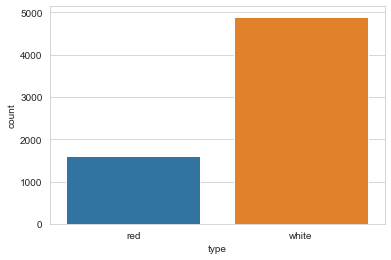

In [13]:
sns.countplot(data=df, x="type")

<AxesSubplot:xlabel='quality', ylabel='count'>

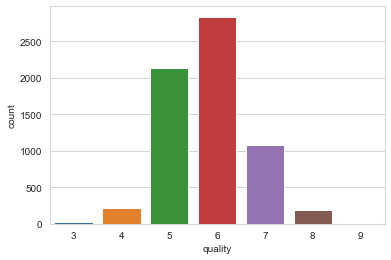

In [14]:
sns.countplot(df["quality"])

Text(0.5, 0, 'quality score (0=high, 1=low, 2=med)')

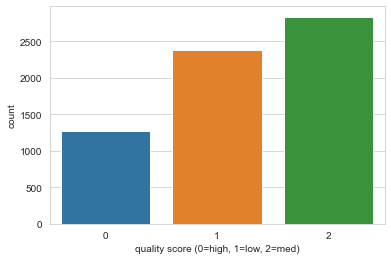

In [13]:
sns.countplot(df["quality score"])
plt.xlabel("quality score (0=high, 1=low, 2=med)")

<AxesSubplot:>

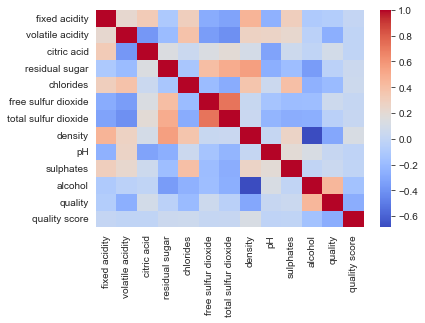

In [14]:
sns.heatmap(df.corr(), cmap="coolwarm")

* Strong correlation between quality and alcohol.
* Negative correlation between quality and density/volatile acidity/chlorides.
* Correlation between quality and free sulfur dioxide/citric acid.

## Quality analysis depending on different parameters:
#### Alcohol expected to have a positive impact on quality.
#### Free sulfur dioxide and citric acid may have a positive impact on quality but probably negligible compared to the impact of alcohol.
#### Density, volatile acidity and chlorides expected to have a negative impact on quality.

Text(0.5, 1.0, 'Alcohol vs. Quality')

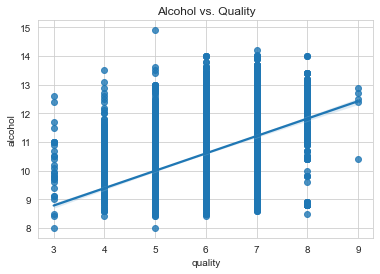

In [15]:
sns.regplot(data=df, x="quality", y="alcohol")
plt.title("Alcohol vs. Quality")

Sharp increase in quality strongly correlated with a rise in alcohol.

Text(0.5, 1.0, 'Free Sulfur Dioxide vs. Quality')

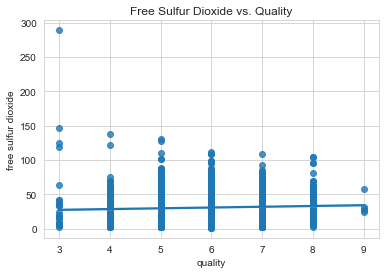

In [16]:
sns.regplot(data= df, x="quality", y="free sulfur dioxide")
plt.title("Free Sulfur Dioxide vs. Quality")

Minimal rise in quality associated with an increase in sulfur dioxide.

Text(0.5, 1.0, 'Citric Acid vs. Quality')

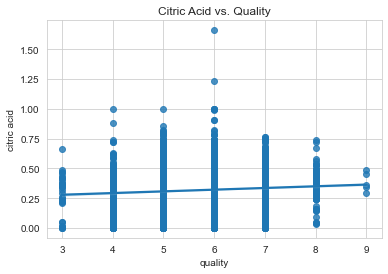

In [17]:
sns.regplot(data= df, x="quality", y="citric acid")
plt.title("Citric Acid vs. Quality")

Slight rise in quality associated with an increase in citric acid.

Text(0.5, 1.0, 'Volatile Acidity vs. Quality')

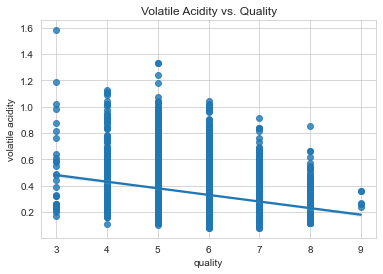

In [18]:
sns.regplot(data= df, x="quality", y="volatile acidity")
plt.title("Volatile Acidity vs. Quality")

Observable decrease in quality due to volatile acidity.

Text(0.5, 1.0, 'Chlorides vs. Quality')

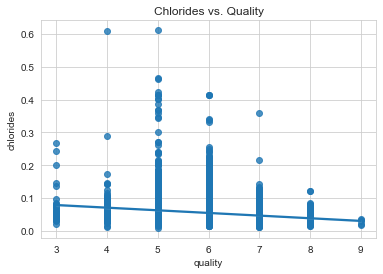

In [19]:
sns.regplot(data= df, x="quality", y="chlorides")
plt.title("Chlorides vs. Quality")

Text(0.5, 1.0, 'Density vs. Quality')

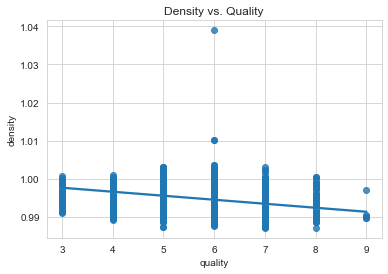

In [20]:
sns.regplot(data= df, x="quality", y="density")
plt.title("Density vs. Quality")

Quality increases slightly as density and chlorides decrease.

## EDA interpretation:
* Positive:

High alcohol content in wine leads to a fuller body. A higher alcohol content indicates that the viticulture involved had a better ripeness at harvest, which is often associated with better quality wine. It also implies that the fermentation achieved complete or near-complete dryness. Hence, quality can be expected to rise with alcohol content.

Citric acid often adds flavor and "freshness" to wine. An increase in citric acid is therefore expected to have a positive effect on wine quality, which correlates well with the EDA analysis results. 

Free sulfur dioxide prevents microbial growth. It can also prevent the wine from oxidizing. It can therefore be considered plausible that free sulfur dioxide can contribute to wine quality.

* Negative:

Volatile acidity represents the quantity of acetic acid in wine. High volatile acidity negatively impacts wine quality as acetic acid is strongly affiliated with a vinegar-like taste. This information correlates well with the EDA analysis.

Density changes depending on the alcohol content and residual sugar in wine. High residual sugar implies fermentation did not achieve complete or near-complete dryness, which often has an impact on wine quality. As alcohol increases, density is expected to drop. According to the data shown above, a rise in alcohol leads to an increase in quality and a decrease in density. Lower density wines are observed to be higher quality in the regression plot shown above.

Chlorides don't have a major impact on wine quality, though since they represent the salt content in wine, it can be expected to observe a minor decrease in quality if the amount of chlorides in wine increases.

## Machine Learning

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality score
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,1.239957
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.758664
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


### Logistic Regression

#### Normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
df2= df.drop(["type","abs quality"],axis=1)

scaler = MinMaxScaler()
scaler_fit = scaler.fit(df2)
df_scaled = scaler_fit.transform(df2)

df_scaled

array([[0.29752066, 0.41333333, 0.        , ..., 0.20289855, 0.33333333,
        0.5       ],
       [0.33057851, 0.53333333, 0.        , ..., 0.26086957, 0.33333333,
        0.5       ],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.26086957, 0.33333333,
        0.5       ],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.20289855, 0.5       ,
        1.        ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.69565217, 0.66666667,
        0.        ],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.55072464, 0.5       ,
        1.        ]])

In [24]:
df3 = pd.DataFrame(df_scaled, columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide", "density","pH","sulphates","alcohol","quality","quality score"])

In [25]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality score
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.5
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.5
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.5
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,0.5
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,0.0


In [26]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,abs quality,quality score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,high,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df2.drop(["quality score"],axis=1)
y = df2["quality score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.368, random_state=42)

In [20]:
X_train.shape

(4106, 12)

In [21]:
X_test.shape

(2391, 12)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
pred = lr.predict(X_test)
prob = lr.predict_proba(X_test)

In [36]:
print(confusion_matrix(y_test,pred))

[[367   0  89]
 [  0 819  27]
 [ 81  44 964]]


In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       456
           1       0.95      0.97      0.96       846
           2       0.89      0.89      0.89      1089

    accuracy                           0.90      2391
   macro avg       0.89      0.89      0.89      2391
weighted avg       0.90      0.90      0.90      2391



In [38]:
score = lr.score(X_test, y_test)
print(score)

0.8992053534086156


### Decision Tree Classifier

#### Normalization

In [39]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

x = df2.iloc[:,:-2]
std_x = standard.fit_transform(x)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
X_train, X_test, y_train, y_test = train_test_split(std_x, quality_score, test_size=0.2366, random_state=48)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier()

In [43]:
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
print(score)

0.6631989596879063


In [44]:
print(confusion_matrix(y_test, pred_dtc))

[[196  20  80]
 [ 29 392 160]
 [ 93 136 432]]


In [45]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       296
           1       0.72      0.67      0.69       581
           2       0.64      0.65      0.65       661

    accuracy                           0.66      1538
   macro avg       0.66      0.66      0.66      1538
weighted avg       0.67      0.66      0.66      1538



### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier()

In [48]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
print(score)

0.7197659297789337


In [49]:
print(confusion_matrix(y_test, pred_rfc))

[[198  11  87]
 [  8 438 135]
 [ 62 128 471]]


In [50]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       296
           1       0.76      0.75      0.76       581
           2       0.68      0.71      0.70       661

    accuracy                           0.72      1538
   macro avg       0.73      0.71      0.72      1538
weighted avg       0.72      0.72      0.72      1538



## Wine quality prediction

In [25]:
df_pred = pd.read_csv("cherry-wine.csv", delimiter=";")
df_pred

,ID,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,Ph,Sulphates,Alcohol
0,Dry,8.30,0.3,7.9,1.20,NaN,13,52,1.0010,3.6,NaN,10.05
1,Semi-dry,8.30,0.4,7.8,13.70,NaN,15,48,1.0050,3.7,NaN,11.40
2,Fortified,8.00,0.4,7.5,21.60,NaN,19,72,1.0043,3.7,NaN,16.70
3,Mistel,9.10,0.4,8.6,74.40,NaN,17,69,1.0246,3.7,NaN,15.90
4,Sparkling,8.40,0.4,7.9,1.30,NaN,12,33,1.0008,3.6,NaN,10.00
5,Market,4.35,0.9,3.2,8.65,NaN,19,166,0.9969,3.9,NaN,11.20


In [26]:
X = df2.drop(["quality score","chlorides","sulphates","quality"],axis=1)
y = df2["quality score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.368, random_state=42)

lr2= LogisticRegression()
lr2.fit(X_train,y_train)

LogisticRegression()

In [38]:
X_pred = df_pred.drop(["ID","Chlorides","Sulphates"],axis=1)
prediction = lr2.predict(X_pred)
print(prediction)
predicted_quality = pd.DataFrame(prediction, columns=["Predicted quality"])
predicted_quality

[2 2 0 0 2 0]


,Predicted quality
0,2
1,2
2,0
3,0
4,2
5,0


In [39]:
df_merged = df_pred.join(predicted_quality)
df_merged

,ID,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,Ph,Sulphates,Alcohol,Predicted quality
0,Dry,8.30,0.3,7.9,1.20,NaN,13,52,1.0010,3.6,NaN,10.05,2
1,Semi-dry,8.30,0.4,7.8,13.70,NaN,15,48,1.0050,3.7,NaN,11.40,2
2,Fortified,8.00,0.4,7.5,21.60,NaN,19,72,1.0043,3.7,NaN,16.70,0
3,Mistel,9.10,0.4,8.6,74.40,NaN,17,69,1.0246,3.7,NaN,15.90,0
4,Sparkling,8.40,0.4,7.9,1.30,NaN,12,33,1.0008,3.6,NaN,10.00,2
5,Market,4.35,0.9,3.2,8.65,NaN,19,166,0.9969,3.9,NaN,11.20,0
